# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus
0. Inspect data
0. Clean and Process Text
0. Vectorize your text
0. Classify your text using Multinomial Naive Bayes
0. Classify your text using Random Forest. 
0. Eval your models.  
0. Classify a NEW PIECE of text. Any string you want to feed it. 


## PART 2:
- Republican vs Democrat Tweet Classifier
0.  This is self guided, can you get a f1 above 82%?  -its not easy.

In [128]:
## IMPORT YOUR LIBS HERE
import pandas as pd

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Import our metrics to evaluate our model
from sklearn import metrics

# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for helping us with text
import string
# Regular Expression Library
import re

from sklearn.model_selection import GridSearchCV

import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
# You may need to download these from nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
stopwords = stopwords.words('english')

## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [81]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
df = pd.read_csv('data/20-newsgroups.csv')
# 2. Print the shape
df.shape

(11314, 4)

In [82]:
# 3. Inspect / remove nulls and duplicates
df.describe()
print(df.isna().sum(),"\n~~~~~~~~~\nduplicates: ",df.duplicated().sum())


id                0
message           0
topic             0
topic_category    0
dtype: int64 
~~~~~~~~~
duplicates:  0


In [83]:
# 4. Find class balances, print out how many of each topic_category there are.
df['topic_category'].value_counts()

topic_category
rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: count, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
0. EXTRA CREDIT:  
    0. Make a function that stemms all words. 
    0. Make a function that removes all stopwords.

5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [84]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
test_string = test_string.lower()


In [85]:
# 2. Make a function that removes all punctuation. 
def remove_punctuation(sentence):
    return re.sub(r'[^\w\s]',"",sentence)

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'

test_string = remove_punctuation(test_string)
print(test_string)

This is a sentence 50 With lots of punctuation  other things


In [86]:
# 3. Make a function that removes all stopwords.
def remove_stopwords(sentence):
    new = sentence.split(" ")
    result = ""
    for word in new:
        if word not in stopwords:
            result += word + " "
    
    return result
    
test_string = 'This is a sentence! With some different stopwords i have added in here.'
print(remove_stopwords(test_string))

This sentence! With different stopwords added here. 


In [87]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'

def stem_sentence(sentence):
    words = word_tokenize(sentence)
    stemmer = PorterStemmer()
    stemmed_words =[]
    for word in words:
        stemmed_words.append(stemmer.stem(word))
    return ' '.join(stemmed_words)

print(stem_sentence(test_string))


i play and start play with player and we all love to play with play


In [88]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

test_string = 'I played and started playing with players and we all love to play with plays'

def nlp_pipeline(txt):
    txt = txt.lower()
    txt = remove_punctuation(txt)
    txt = remove_stopwords(txt)
    txt = stem_sentence(txt)
    return txt 
print(nlp_pipeline(test_string))


play start play player love play play


In [89]:
df.head()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [90]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message'] = df['message'].apply(nlp_pipeline)

0        lerxstwamumdedu where thing subject car thi nn...
1        guykuocarsonuwashingtonedu guy kuo subject si ...
2        twillisececnpurdueedu thoma e willi subject pb...
3        jgreenamb joe green subject weitek p9000 organ...
4        jcmheadcfaharvardedu jonathan mcdowel subject ...
                               ...                        
11309    jimzisfeinfactorycom jim zisfein subject migra...
11310    ebodinpearltuftsedu subject screen death mac p...
11311    westesnetcomcom est subject mount cpu cooler v...
11312    stevehcrlgw steven collin subject sphere 4 poi...
11313    gunningccocaltechedu kevin j gun subject stole...
Name: message, Length: 11314, dtype: object

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [91]:
# 0. Define your `X` and `y` data. 
X = df['message']
y = df['topic_category']

In [92]:
# 1. Train test split your data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [93]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
vectorizer = TfidfVectorizer()

In [94]:
# 3. Fit your vectorizer using your X data
vectorizer.fit(X_train)


TfidfVectorizer()

In [95]:
# 4. Transform your X data using your fitted vectorizer. 
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [96]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print(X_train.shape)


(9051, 116904)


___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [97]:
# 1. Initalize an empty model. 
model = MultinomialNB(alpha=0.1)




In [98]:
# Fit our model with our training data.
model.fit(X_train, y_train)


MultinomialNB(alpha=0.1)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [99]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)



In [100]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.899691


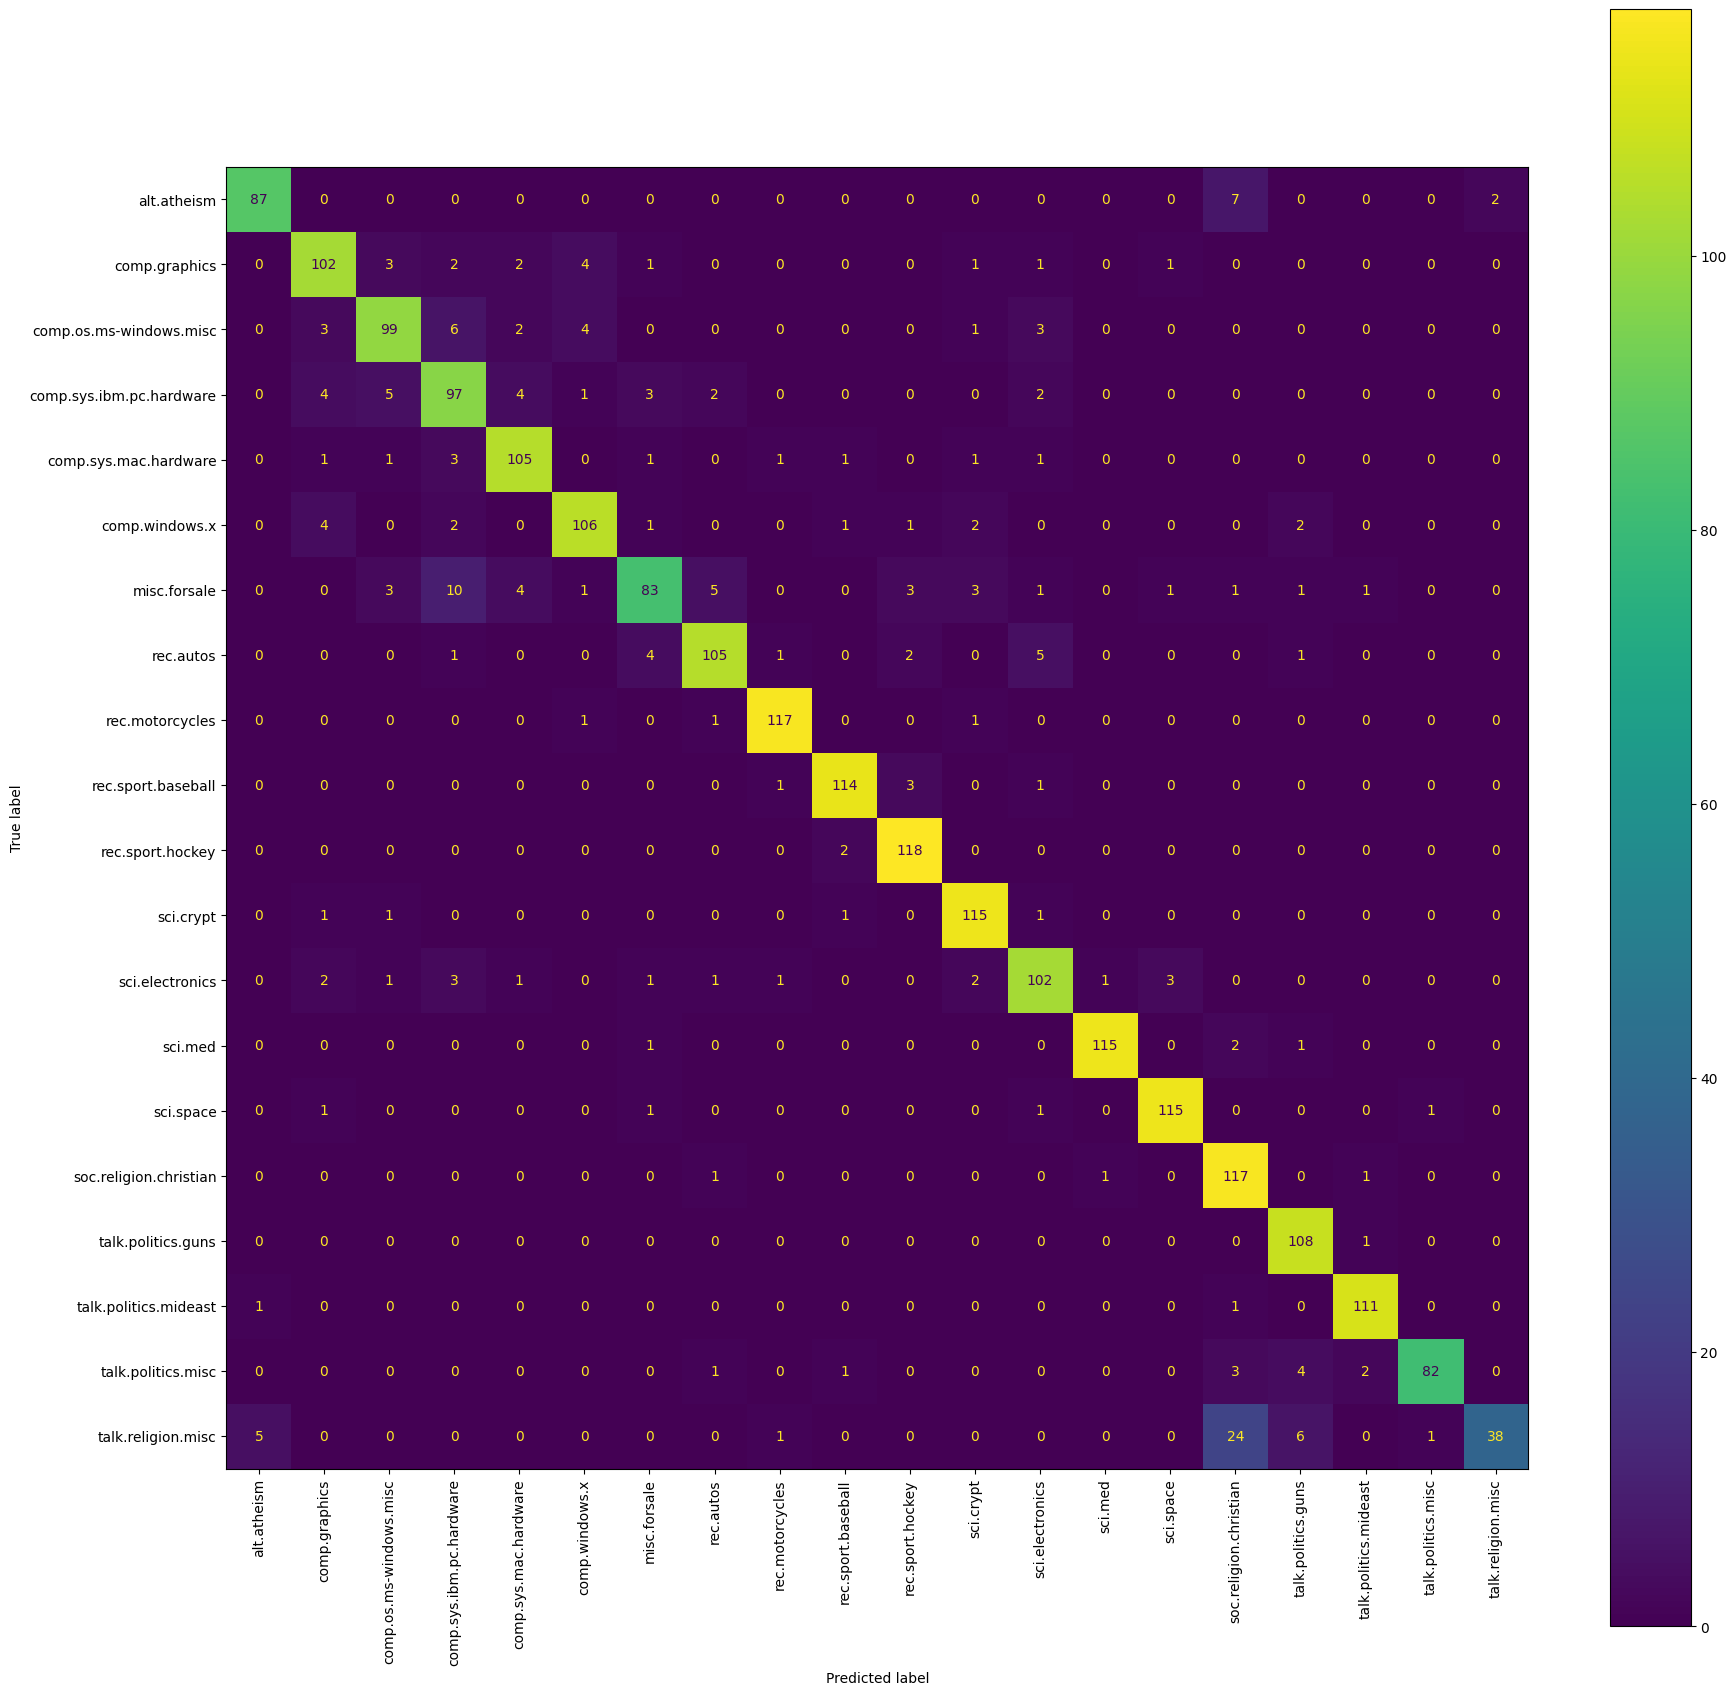

In [101]:
# 3. Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

In [102]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.94      0.91      0.92        96
           comp.graphics       0.86      0.87      0.87       117
 comp.os.ms-windows.misc       0.88      0.84      0.86       118
comp.sys.ibm.pc.hardware       0.78      0.82      0.80       118
   comp.sys.mac.hardware       0.89      0.91      0.90       115
          comp.windows.x       0.91      0.89      0.90       119
            misc.forsale       0.86      0.71      0.78       117
               rec.autos       0.91      0.88      0.89       119
         rec.motorcycles       0.96      0.97      0.97       120
      rec.sport.baseball       0.95      0.96      0.95       119
        rec.sport.hockey       0.93      0.98      0.96       120
               sci.crypt       0.91      0.97      0.94       119
         sci.electronics       0.86      0.86      0.86       118
                 sci.med       0.98      0.97      0.97       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [103]:
my_sentence = 'A Long Island homeowner is accused of pointing a handgun at a child who was dropping off candy and accidentally went to the wrong house, police told news outlets.'
# 1. Apply the text pipeline to your sentence
my_sentence_cleaned = nlp_pipeline(my_sentence)
print(my_sentence_cleaned)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([my_sentence_cleaned])

# 3. Use the model to predict your new `X`. 
model.predict(X)

# 4. Print the prediction
manual_pred = model.predict_proba(X)
for class_name, percentage in zip(model.classes_, manual_pred.round(3)[0]):
    print(class_name, ': ', percentage)

long island homeown accus point handgun child drop candi accident went wrong hous polic told news outlet
alt.atheism :  0.015
comp.graphics :  0.005
comp.os.ms-windows.misc :  0.007
comp.sys.ibm.pc.hardware :  0.008
comp.sys.mac.hardware :  0.028
comp.windows.x :  0.019
misc.forsale :  0.008
rec.autos :  0.091
rec.motorcycles :  0.056
rec.sport.baseball :  0.016
rec.sport.hockey :  0.011
sci.crypt :  0.047
sci.electronics :  0.052
sci.med :  0.067
sci.space :  0.018
soc.religion.christian :  0.063
talk.politics.guns :  0.341
talk.politics.mideast :  0.094
talk.politics.misc :  0.036
talk.religion.misc :  0.019


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [109]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
rdf = pd.read_csv('data/dem-vs-rep-tweets.csv')
print(rdf.shape)
rdf.head()



(86460, 3)


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [110]:
print(rdf.isna().sum(),"\n~~~~~~~~~\nduplicates: ",rdf.duplicated().sum())

Party     0
Handle    0
Tweet     0
dtype: int64 
~~~~~~~~~
duplicates:  57


In [111]:
rdf = rdf.drop_duplicates()

In [112]:
rdf['Party'].value_counts()

Party
Republican    44362
Democrat      42041
Name: count, dtype: int64

In [113]:
rdf['Tweet'] = rdf['Tweet'].apply(nlp_pipeline)

print(rdf['Tweet'][0])

today senat dem vote savetheinternet proud support similar netneutr legisl hous httpstcon3tggdlu1l


In [116]:
X = rdf['Tweet'].values
y = rdf['Party'].values

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [118]:
vectorizer = TfidfVectorizer()

In [120]:
vectorizer.fit(X_train)

TfidfVectorizer()

In [121]:
# transform X data
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

# print shape of X
print('Shape of X_train:', X_train.shape)

Shape of X_train: (69122, 101634)


In [123]:
# initialize multinomialNB model
model = MultinomialNB(alpha=0.2)

# fit model
model.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [124]:

# make predictions on testing data
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

In [125]:
# print accuracy score
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.818934


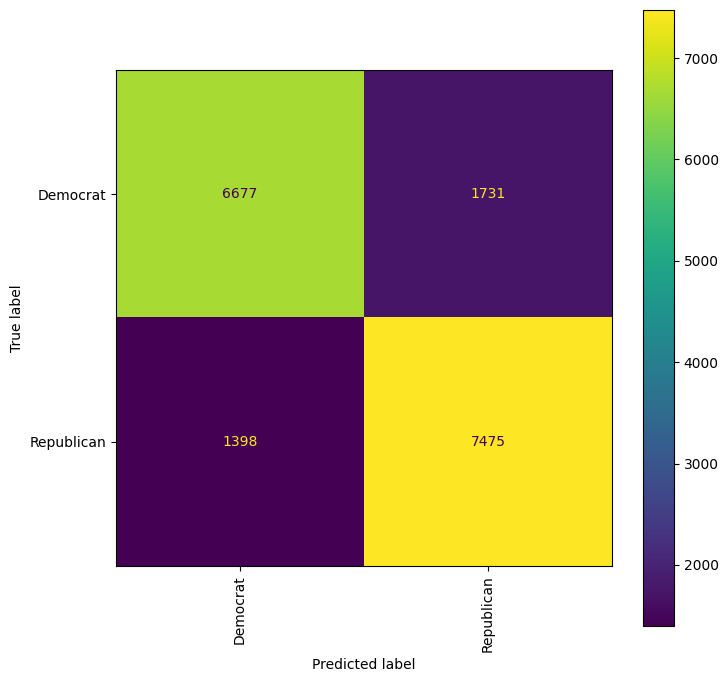

In [126]:
# confusion matrix using ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

In [127]:
# evaluation results using classification_report
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

    Democrat       0.83      0.79      0.81      8408
  Republican       0.81      0.84      0.83      8873

    accuracy                           0.82     17281
   macro avg       0.82      0.82      0.82     17281
weighted avg       0.82      0.82      0.82     17281



In [129]:
params = { 
    'alpha': [0.1, 0.15, 0.2],
    'force_alpha': [False, True],
    'fit_prior': [False, True]
    }

grid_search_cv = GridSearchCV(MultinomialNB(), params)

grid_search_cv.fit(X_train, y_train)

print(grid_search_cv.best_params_)

{'alpha': 0.2, 'fit_prior': True, 'force_alpha': False}


In [130]:
# make predictions on testing data
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

# print accuracy score
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.818934


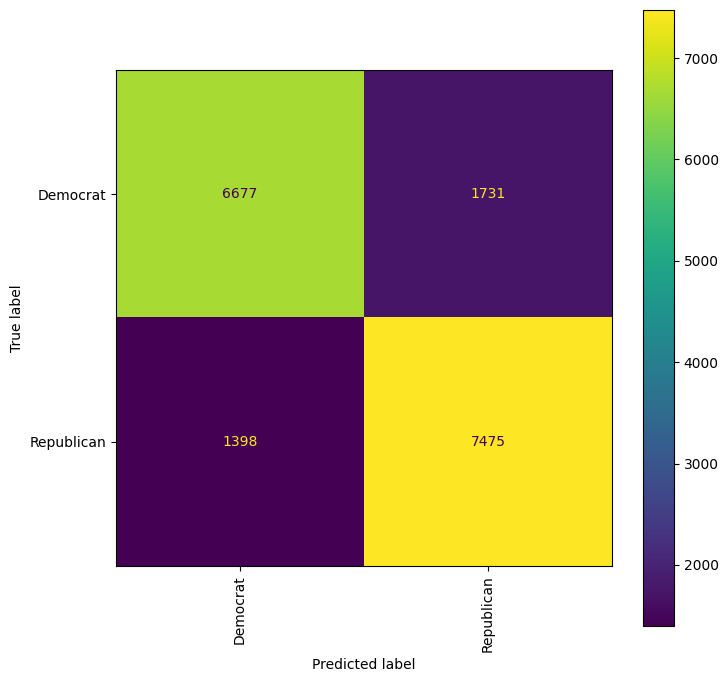

In [131]:
# confusion matrix using ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

In [132]:

# evaluation results using classification_report
print(classification_report(y_test, y_pred, target_names=model.classes_, digits=4))

              precision    recall  f1-score   support

    Democrat     0.8269    0.7941    0.8102      8408
  Republican     0.8120    0.8424    0.8269      8873

    accuracy                         0.8189     17281
   macro avg     0.8194    0.8183    0.8185     17281
weighted avg     0.8192    0.8189    0.8188     17281

